In [2]:
import torch
from torch.distributions import multinomial
from d2l import torch as d2l
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

In [3]:
# 随机抽样
fair_probs = torch.ones([6])/6  # 长度为六的张量
multinomial.Multinomial(1, fair_probs).sample()  # 抽样

tensor([0., 1., 0., 0., 0., 0.])

In [4]:
multinomial.Multinomial(10, fair_probs).sample()  # 将10随机分配

tensor([1., 2., 2., 4., 1., 0.])

In [5]:
# 模拟1000次投掷骰子
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000

tensor([0.1700, 0.1680, 0.1850, 0.1680, 0.1470, 0.1620])

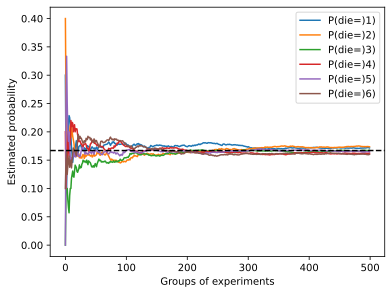

In [12]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=('P(die=)'+str(i+1)+')'))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')  # 1/6渐近线
d2l.plt.gca().set_xlabel('Groups of experiments')  # x轴标签
d2l.plt.gca().set_ylabel('Estimated probability')  # y轴标签
d2l.plt.legend()  # 图例